## Lab 4.1: Feature Matching

In this lab we will explore geometric transformations, SIFT feature extraction and matching.

Some material is borrowed from the scikit-image tutorials.

In [47]:
import matplotlib.pyplot as plt

from skimage import data
from skimage import transform
from skimage.color import rgb2gray
from skimage.feature import match_descriptors, plot_matches, SIFT

In [48]:
img1 = rgb2gray(data.astronaut())

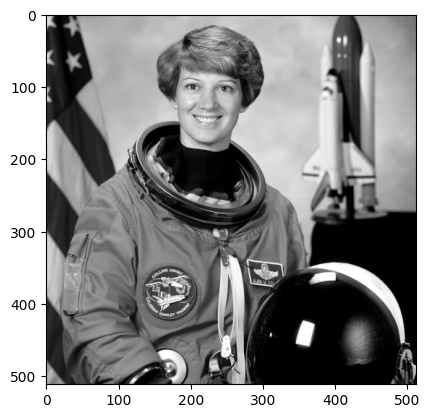

In [49]:
plt.imshow(img1,cmap='gray')

scikit-image provides functions for applying geometric transformations to images, such as rotations and affine transformations.

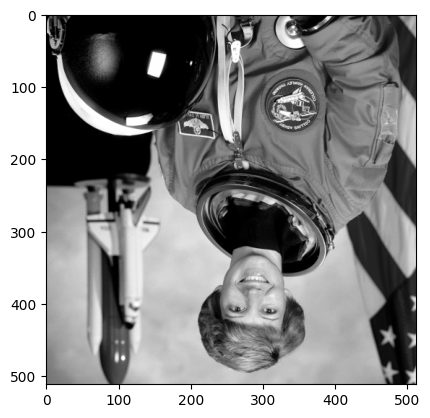

In [50]:
img2 = transform.rotate(img1, 180)
plt.imshow(img2,cmap='gray')

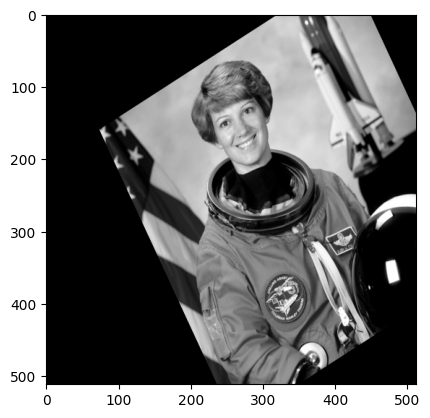

In [51]:
tform = transform.AffineTransform(scale=(1.3, 1.1), rotation=0.5, translation=(0, -200))
img3 = transform.warp(img1, tform)
plt.imshow(img3,cmap='gray')

Now let's extract SIFT features from the images.

First we create the ```SIFT``` object.

In [52]:
descriptor_extractor = SIFT()

```.detect_and_extract()``` extracts the SIFT keypoints and their descriptors.

In [53]:
descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

Each keypoint is a 2D location in the image.  They are stacked into an $N\times2$ array.

In [54]:
keypoints1.shape

(1234, 2)

In [55]:
keypoints1

array([[ 16,  44],
       [ 17, 230],
       [ 20, 220],
       ...,
       [442, 359],
       [449, 432],
       [265,  87]])

Let's plot the locations of the keypoints on the image.

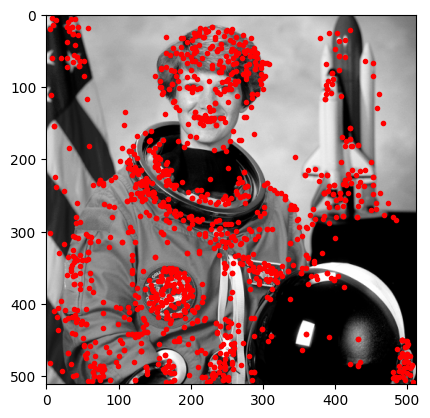

In [56]:
plt.imshow(img1,cmap='gray')
plt.plot(keypoints1[:,1],keypoints1[:,0],'r.')

The descriptors are 128-dimensional vectors.  In this implementation, they have been quantized and clipped into ```uint8``` values.

In [57]:
descriptors1.shape

(1234, 128)

In [58]:
descriptors1

array([[ 20,  19, 107, ...,   0,   8,  31],
       [  0,   0,   0, ...,   3,   9,  82],
       [  0,   0,   0, ...,   0,   0,  25],
       ...,
       [  0,   4,   4, ...,   4,   1,   4],
       [ 97, 118,   0, ...,   3,  12,   7],
       [ 34,   7,  11, ...,  99,  34,  17]], dtype=uint8)

Now let's extract features for the transformed images.

In [59]:
descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

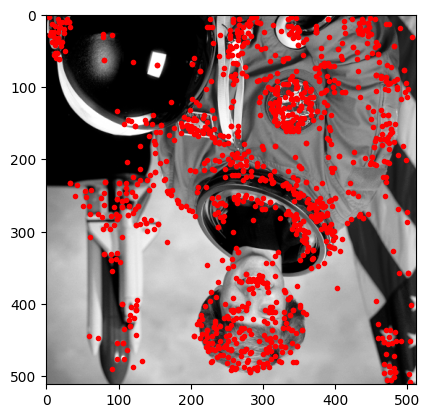

In [60]:
plt.imshow(img2,cmap='gray')
plt.plot(keypoints2[:,1],keypoints2[:,0],'r.')

Note how the set of keypoints looks almost identical to the original, since SIFT is invariant to rotation.

In [61]:
descriptor_extractor.detect_and_extract(img3)
keypoints3 = descriptor_extractor.keypoints
descriptors3 = descriptor_extractor.descriptors

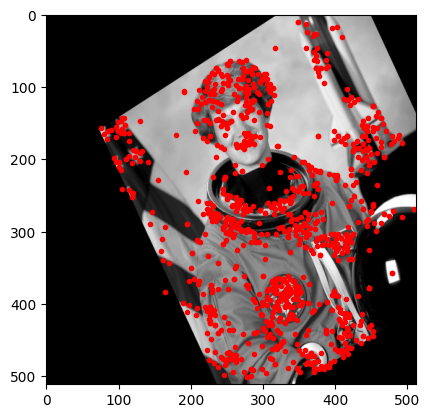

In [62]:
plt.imshow(img3,cmap='gray')
plt.plot(keypoints3[:,1],keypoints3[:,0],'r.')

SIFT is not completely invariant to affine transformation, which is why the set of keypoints has changed somewhat.

The ```match_descriptors``` method performs nearest-neighbor matching with optional an second-nearest-neighbor ratio test and cross-consistency check.

In [63]:
matches12 = match_descriptors(
    descriptors1, descriptors2, max_ratio=0.6, cross_check=True
)

Each row of the ```match_descriptors``` result provides matching indices in the first and second descriptor lists.

In [64]:
matches12

array([[   0,  564],
       [   1, 1133],
       [   2,  562],
       ...,
       [1231,  986],
       [1232,  984],
       [1233, 1035]])

In [65]:
matches13 = match_descriptors(
    descriptors1, descriptors3, max_ratio=0.6, cross_check=True
)

Now let's use ```plot_matches``` to show the matches.  

/var/folders/cn/043rpj9s7gn508l3jykd91gh0000gn/T/ipykernel_28036/2425233032.py:2: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  plot_matches(ax, img1, img2, keypoints1, keypoints2, matches12)


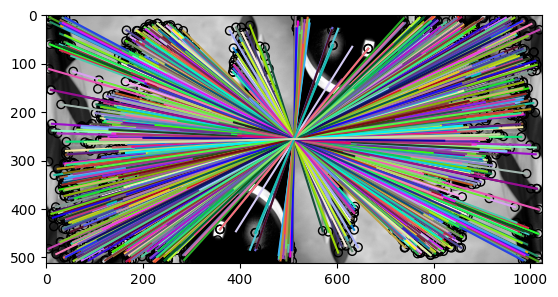

In [66]:
fig,ax = plt.subplots()
plot_matches(ax, img1, img2, keypoints1, keypoints2, matches12)

There are a lot of matches; here we show 10% of them for better visibility.

/var/folders/cn/043rpj9s7gn508l3jykd91gh0000gn/T/ipykernel_28036/2697162082.py:2: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  plot_matches(ax, img1, img2, keypoints1, keypoints2, matches12[::10])


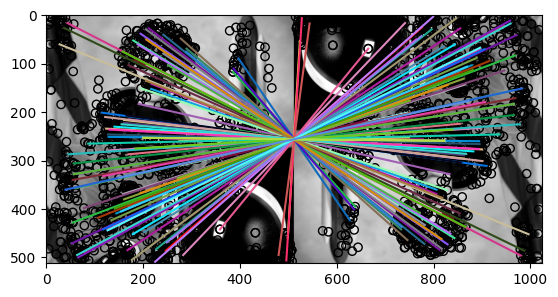

In [67]:
fig,ax = plt.subplots()
plot_matches(ax, img1, img2, keypoints1, keypoints2, matches12[::10])

/var/folders/cn/043rpj9s7gn508l3jykd91gh0000gn/T/ipykernel_28036/2480573207.py:2: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  plot_matches(ax, img1, img3, keypoints1, keypoints3, matches13)


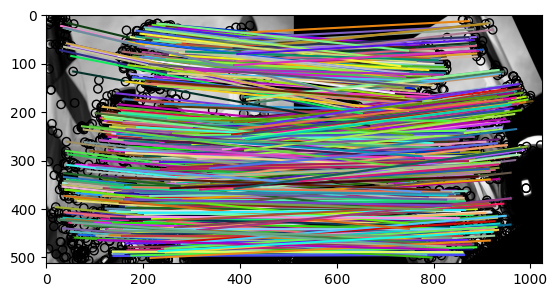

In [68]:
fig,ax = plt.subplots()
plot_matches(ax, img1, img3, keypoints1, keypoints3, matches13)

/var/folders/cn/043rpj9s7gn508l3jykd91gh0000gn/T/ipykernel_28036/2548871418.py:2: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  plot_matches(ax, img1, img3, keypoints1, keypoints3, matches13[::10])


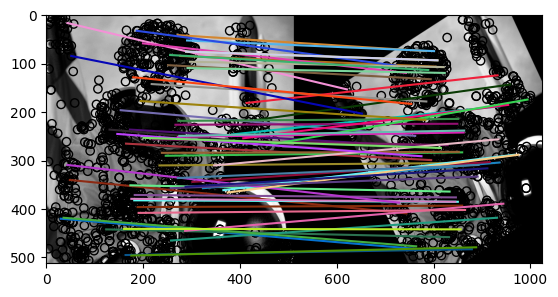

In [69]:
fig,ax = plt.subplots()
plot_matches(ax, img1, img3, keypoints1, keypoints3, matches13[::10])